# Financial Company Customer Survey - Principle Component Analysis

In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

# Load data from the text file into a pandas DataFrame
df = pd.read_csv('data/washington_survey_data.txt', sep='\t')


# Drop unnecessary columns from the DataFrame
columns_to_drop = ['id', 'gender', 'engagement', 'zip', 'channel', 'region', 'public.sector', 'main.focal.value']
df.drop(columns=columns_to_drop, inplace=True)



In [2]:
df.head(5)

,age,mem.edu,progressivism,harm,fair,in.group,authority,purity,account.age,sustainability,localism,pub.greater.priv,experience.more.important,teachers.underpaid,support.of.focal.value
0,56,2,-0.083333,1.00,1.00,1.00,1.00,1.25,9.951,2.333333,2.75,3,3,2,0.000000
1,66,3,2.291667,5.00,4.75,2.25,3.25,2.25,8.838,6.000000,5.75,1,4,5,18.627830
2,71,7,1.000000,3.25,4.25,2.25,3.25,2.75,5.356,5.166667,4.50,4,3,6,28.739986
3,66,7,0.583333,4.25,4.75,4.75,3.25,3.75,9.192,5.500000,4.50,3,3,4,18.055372
4,50,4,-0.500000,2.00,4.50,3.50,4.50,3.25,11.570,2.833333,4.00,2,4,5,4.400921


In [46]:
# Not used for this analysis
# Pivot the data to create a matrix of owners x items
pivot_df = df.pivot_table(
    index='trans',     # Each unique transaction ID becomes a row
    columns='items',   # Each unique item becomes a column
    values='spend',    # The cell values are filled with spending amounts
    fill_value=0      # Empty cells are filled with 0
    
)

In [4]:


# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()

pca.fit(scaled_data)



PCA()

In [5]:
x_pca = pca.transform(scaled_data)



In [6]:
scaled_data.shape
x_pca.shape

(2421, 15)

In [8]:
explained_variance = pca.explained_variance_ratio_[0]
print(f"Amount of variance explained for PC1: {explained_variance:.4f}%")



Amount of variance explained for PC1: 0.2278%


In [9]:
cumulative_variance = 0
for i in range(len(pca.explained_variance_ratio_)):
    explained_variance = pca.explained_variance_ratio_[i]
    cumulative_variance += explained_variance
    print(f"Amount of variance explained for PC{i + 1}: {explained_variance:.4f}% | Cumulative: {cumulative_variance:.2f}%")
    
    if cumulative_variance > .95:
        break
    

Amount of variance explained for PC1: 0.2278% | Cumulative: 0.23%
Amount of variance explained for PC2: 0.1722% | Cumulative: 0.40%
Amount of variance explained for PC3: 0.1012% | Cumulative: 0.50%
Amount of variance explained for PC4: 0.0755% | Cumulative: 0.58%
Amount of variance explained for PC5: 0.0709% | Cumulative: 0.65%
Amount of variance explained for PC6: 0.0658% | Cumulative: 0.71%
Amount of variance explained for PC7: 0.0552% | Cumulative: 0.77%
Amount of variance explained for PC8: 0.0489% | Cumulative: 0.82%
Amount of variance explained for PC9: 0.0456% | Cumulative: 0.86%
Amount of variance explained for PC10: 0.0336% | Cumulative: 0.90%
Amount of variance explained for PC11: 0.0308% | Cumulative: 0.93%
Amount of variance explained for PC12: 0.0276% | Cumulative: 0.95%


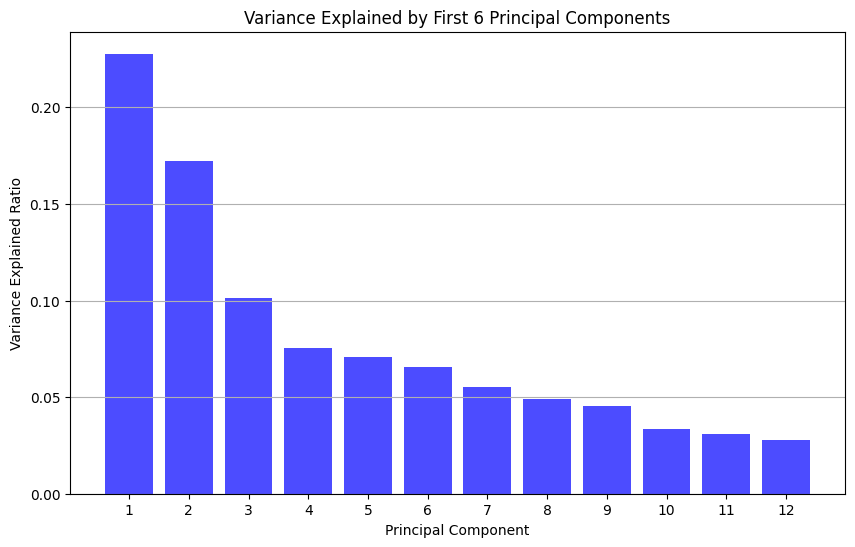

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), pca.explained_variance_ratio_[:12], alpha=0.7, color='blue')
plt.title('Variance Explained by First 6 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

Text(0, 0.5, 'Principle Component 2')

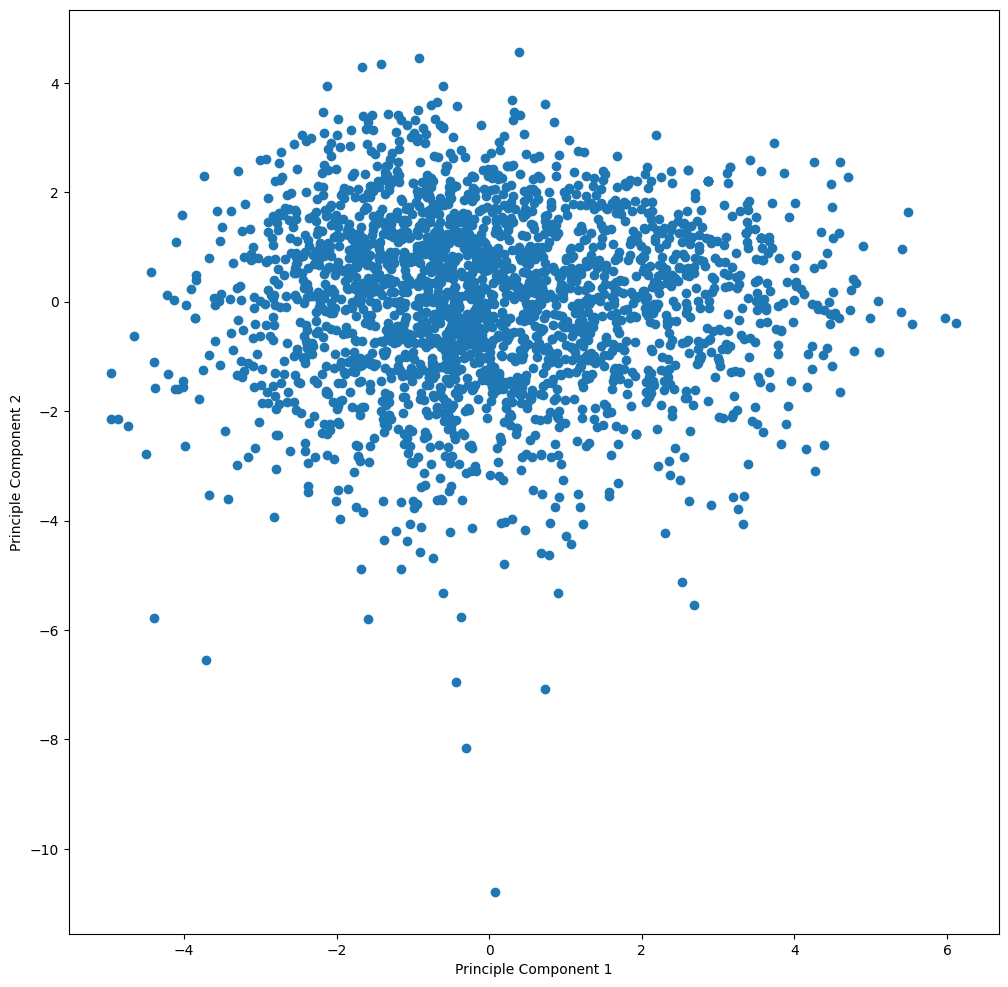

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:,0], x_pca[:,1] )
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")

# Identify Influential Transactions 

In [40]:

# Create a DataFrame with PC1 scores and transaction IDs
pc1_analysis = pd.DataFrame({
    'transaction_number': df.index,
    
    'pc1_score': x_pca[:,0],
    'pc2_score': x_pca[:,1]
})

# Look at extreme cases (most influential transactions)
print("Most extreme transactions by PC1:")
print(pc1_analysis.nlargest(5, 'pc1_score'))
print("\nMost negative transactions by PC1:")
print(pc1_analysis.nsmallest(5, 'pc1_score'))

Most extreme transactions by PC1:
      transaction_number  pc1_score  pc2_score
2217                2217   6.120853  -0.394701
234                  234   5.968676  -0.297662
365                  365   5.543625  -0.412257
1203                1203   5.491421   1.642301
455                  455   5.413565   0.967776

Most negative transactions by PC1:
      transaction_number  pc1_score  pc2_score
402                  402  -4.960259  -2.144492
1596                1596  -4.958193  -1.296145
909                  909  -4.866029  -2.142641
610                  610  -4.732698  -2.265132
959                  959  -4.661414  -0.622008


# Feature Importance
See which original features (items) contribute most to PC1.

Large loadings (positive or negative) indicate that a particular variable strongly relates to a particular principal component. 


In [41]:
pc1_loadings = pd.DataFrame(
    {'Total Items': df.columns,
     'loading': pca.components_[0]  # First principal component
    }).sort_values('loading', ascending=False)

# Show top contributing items
print("Top 10 items contributing to PC1:")
print(pc1_loadings.head(10))

Top 10 items contributing to PC1:
               Total Items   loading
2            progressivism  0.479617
9           sustainability  0.281005
1                  mem.edu  0.232175
13      teachers.underpaid  0.207176
10                localism  0.206161
11        pub.greater.priv  0.105480
14  support.of.focal.value  0.098557
4                     fair  0.042827
3                     harm  0.032224
8              account.age -0.001139


# Clustering Analysis

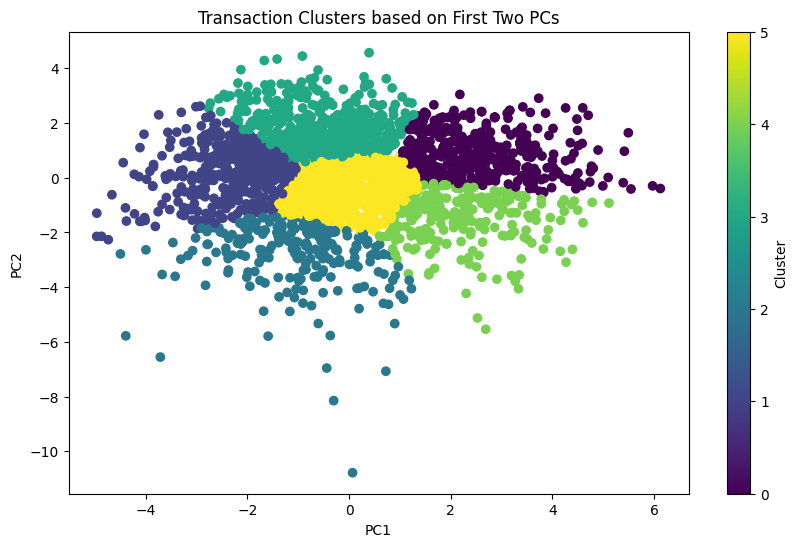

In [48]:
from sklearn.cluster import KMeans

# Use first few PCs for clustering
k = 6  # number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(x_pca[:, :2])  # Using PC1 and PC2

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transaction Clusters based on First Two PCs')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# Adjusting the scope to target Clusters that have PC 1 and 2 values greater than 1.
# Create a DataFrame with PC1 scores and transaction IDs
pc1_analysis = pd.DataFrame({
    'number_of_transactions': df.index,
    
    'pc1_score': x_pca[:,0],
    'pc2_score': x_pca[:,1]
})

# Apply filters for PC1 > 25 and PC2 > -9
filtered_pc1_analysis = pc1_analysis[
    (pc1_analysis['pc1_score'] > 0) &
    #(pc1_analysis['pc1_score'] < 25) &
    #(pc1_analysis['pc2_score'] < 13) &
    (pc1_analysis['pc2_score'] > 0)
]

# Look at extreme cases (most influential transactions)
print("Most extreme transactions by PC1:")
print(filtered_pc1_analysis.nlargest(10, 'pc1_score'))


Most extreme transactions by PC1:
      number_of_transactions  pc1_score  pc2_score
1203                    1203   5.491421   1.642301
455                      455   5.413565   0.967776
394                      394   5.094965   0.007876
448                      448   4.896746   1.011020
411                      411   4.802365   0.345806
939                      939   4.767359   0.421902
1151                    1151   4.746403   0.219684
2273                    2273   4.702291   2.281746
2251                    2251   4.595622   2.552508
842                      842   4.583998   1.251885
